In [1]:
import numpy as np
import pandas as pd

In [2]:
mydata=pd.read_csv('/content/churn_data_logistic2.csv')

In [3]:
# prompt: mydata - column data types

mydata.dtypes

,0
Age,int64
Marital,object
Default,int64
Balance,int64
Housing Loan,int64
Personal Loan,int64
Current Campaign,int64
Churn,int64


Chi-square Test Results and Inference:

Default:
  Chi2 Statistic: 405.2136089455404
  P-Value: 4.036599277209844e-90
  Degrees of Freedom: 1
  Inference: Significant association with Churn.

Housing Loan:
  Chi2 Statistic: 19.578626105704743
  P-Value: 9.654324012454133e-06
  Degrees of Freedom: 1
  Inference: Significant association with Churn.

Personal Loan:
  Chi2 Statistic: 26.86648120571099
  P-Value: 2.180072455745908e-07
  Degrees of Freedom: 1
  Inference: Significant association with Churn.

Current Campaign:
  Chi2 Statistic: 1776.6899584743198
  P-Value: 0.0
  Degrees of Freedom: 1
  Inference: Significant association with Churn.


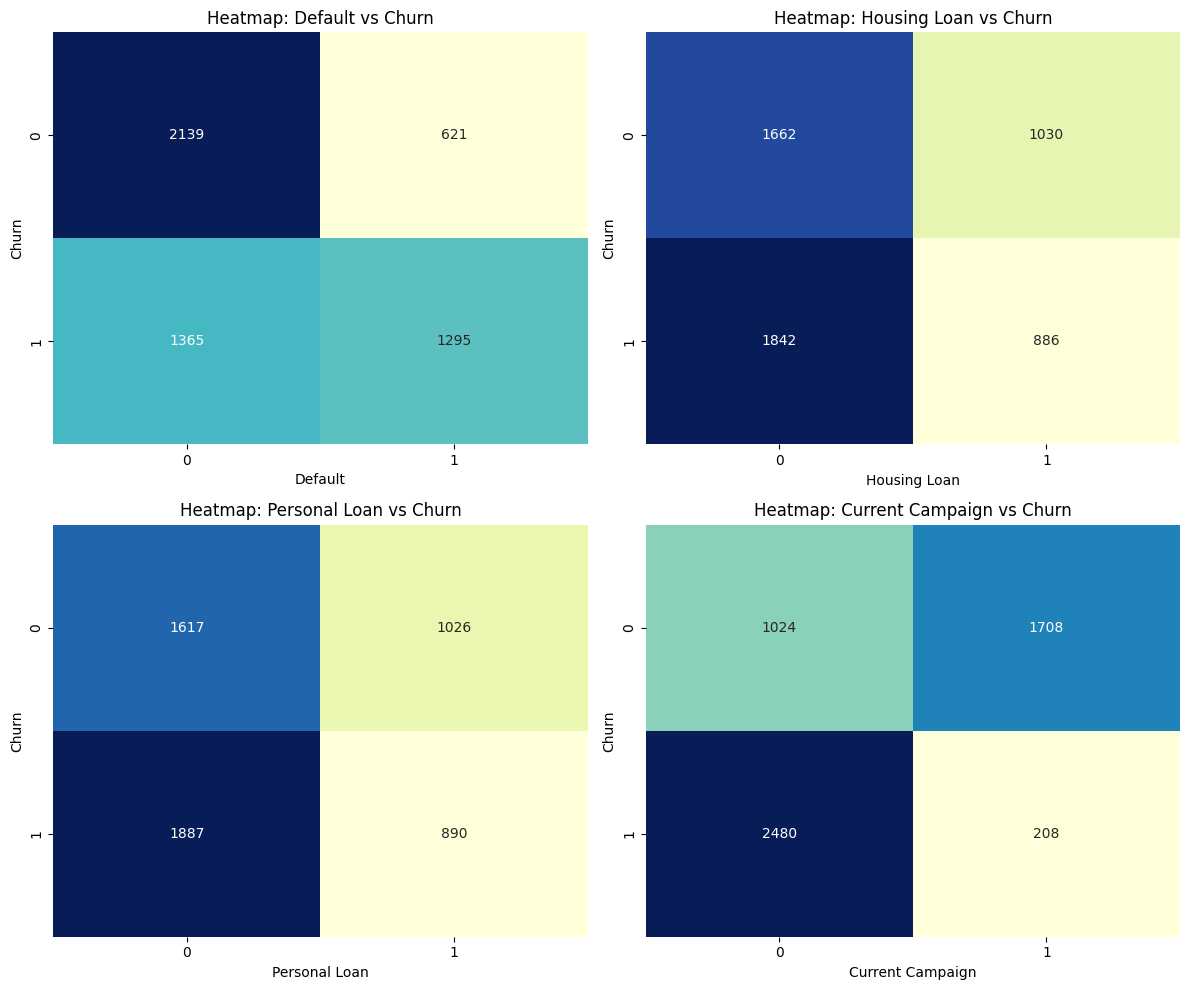

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the uploaded CSV into a DataFrame
mydata = pd.read_csv('/content/churn_data_logistic2.csv')

# List of categorical columns to test
categorical_columns = ['Default', 'Housing Loan', 'Personal Loan', 'Current Campaign']

# Perform the Chi-square test for each categorical variable with respect to 'Churn'
chi2_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(mydata[col], mydata['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2 Statistic': chi2_stat, 'P-Value': p_value, 'Degrees of Freedom': dof}

# Display the Chi-square test results with inference
print("Chi-square Test Results and Inference:")
for col, result in chi2_results.items():
    print(f"\n{col}:")
    print(f"  Chi2 Statistic: {result['Chi2 Statistic']}")
    print(f"  P-Value: {result['P-Value']}")
    print(f"  Degrees of Freedom: {result['Degrees of Freedom']}")
    if result['P-Value'] < 0.05:
        print("  Inference: Significant association with Churn.")
    else:
        print("  Inference: No significant association with Churn.")

# Create a heatmap of the contingency tables for each categorical variable with respect to 'Churn'
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for heatmaps

for i, col in enumerate(categorical_columns):
    contingency_table = pd.crosstab(mydata[col], mydata['Churn'])
    sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', ax=ax[i//2, i%2], cbar=False)
    ax[i//2, i%2].set_title(f"Heatmap: {col} vs Churn")
    ax[i//2, i%2].set_xlabel(col)
    ax[i//2, i%2].set_ylabel('Churn')

# Adjust layout for better display
plt.tight_layout()
plt.show()

First few rows of the encoded dataset:
   Age  Default  Balance  Housing Loan  Personal Loan  Current Campaign  \
0   56        1    36515             1              0                 0   
1   69        0    87144             0              1                 0   
2   46        1    25898             0              1                 0   
3   32        0      -81             0              0                 1   
4   60        0    48070             1              0                 0   

   Churn  Marital_Married  Marital_Single  
0      1            False           False  
1      1            False           False  
2      1            False           False  
3      0             True           False  
4      0             True           False  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               5420 non-nul

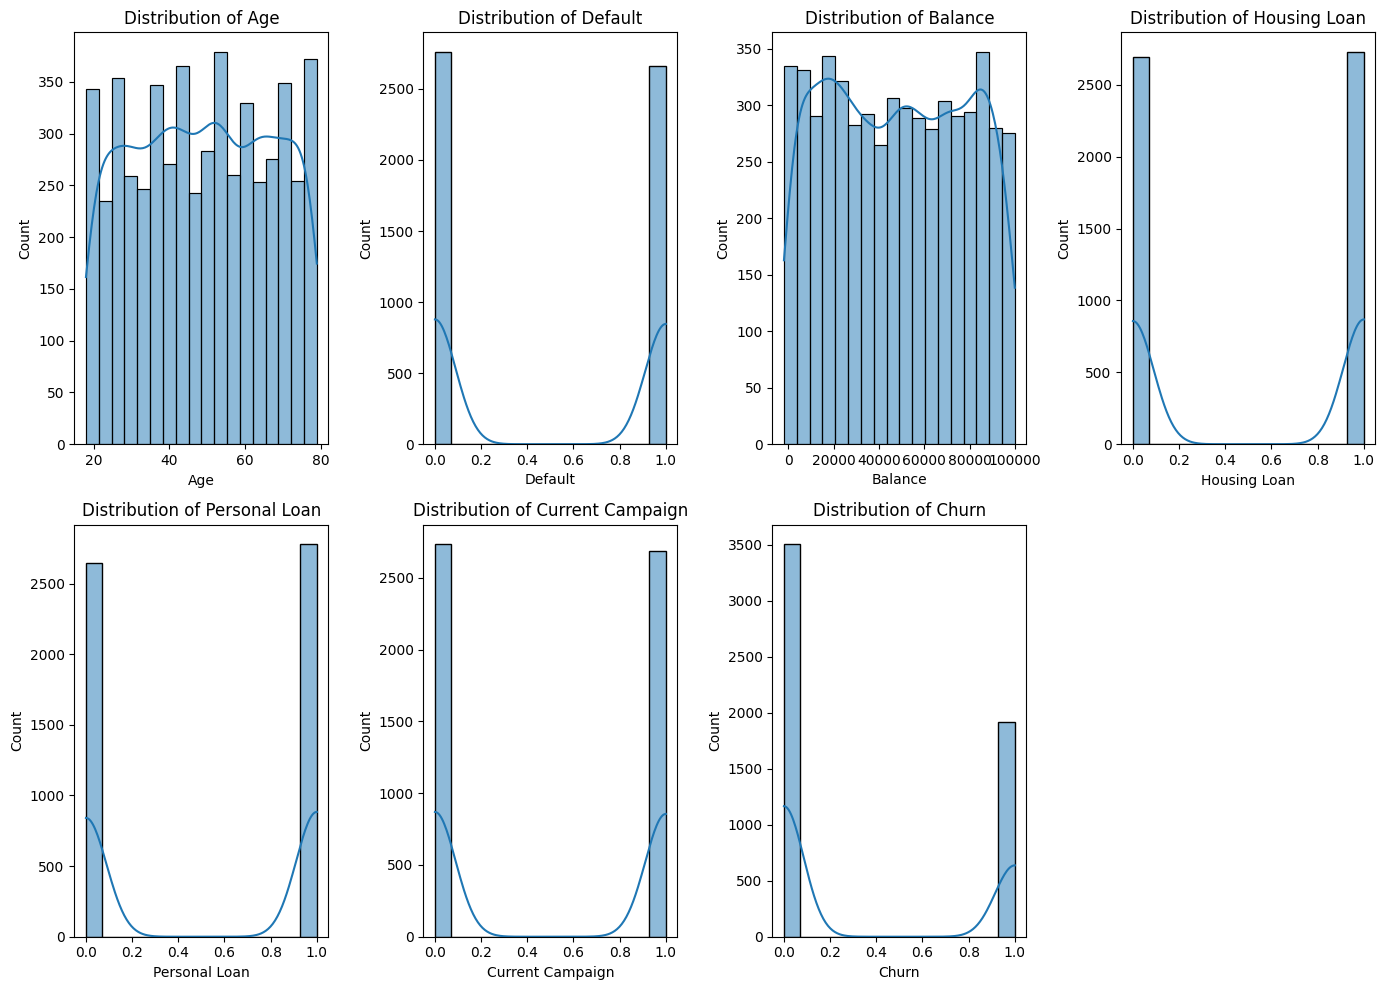

<Figure size 1400x600 with 0 Axes>

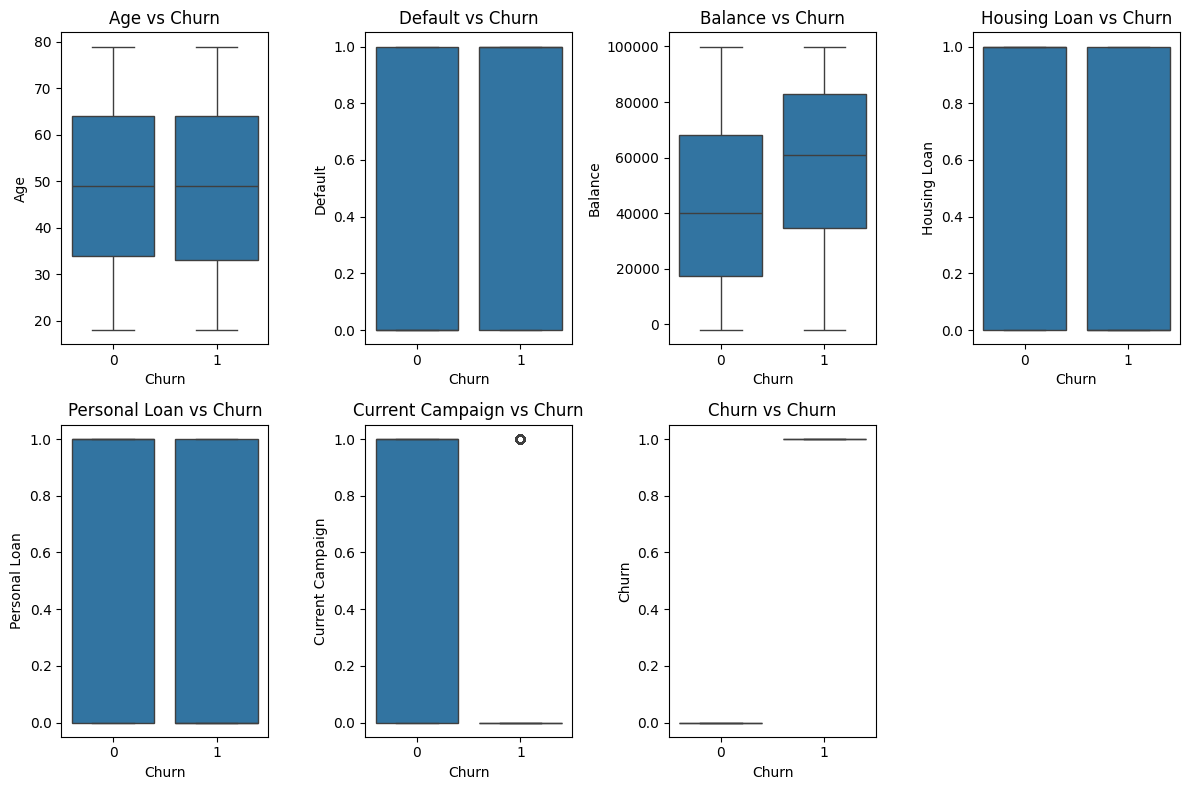

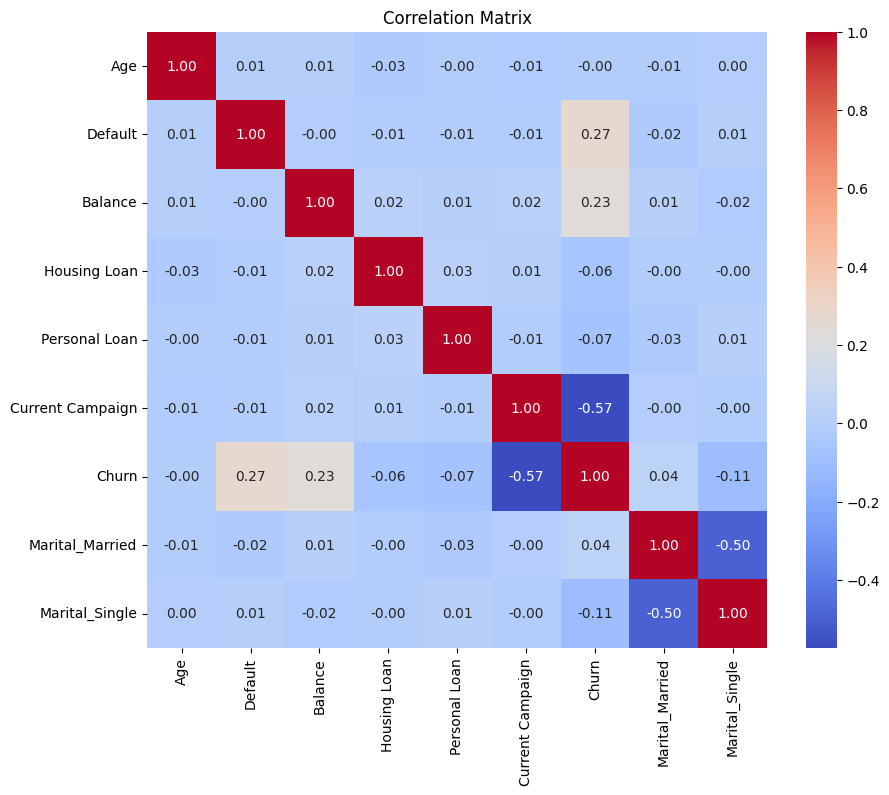


Chi-square Test Results:

Default:
  Chi2 Statistic: 405.2136089455404
  P-Value: 4.036599277209844e-90
  Inference: Significant association with Churn.

Housing Loan:
  Chi2 Statistic: 19.578626105704743
  P-Value: 9.654324012454133e-06
  Inference: Significant association with Churn.

Personal Loan:
  Chi2 Statistic: 26.86648120571099
  P-Value: 2.180072455745908e-07
  Inference: Significant association with Churn.

Current Campaign:
  Chi2 Statistic: 1776.6899584743198
  P-Value: 0.0
  Inference: Significant association with Churn.


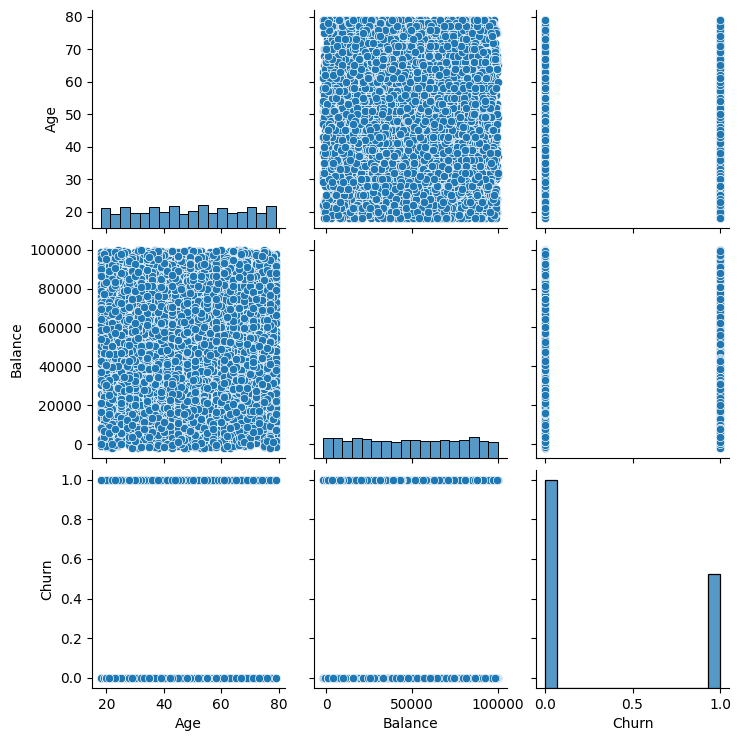


Cross Tabulation for Categorical Variables:
Churn       0     1
Default            
0        2139   621
1        1365  1295


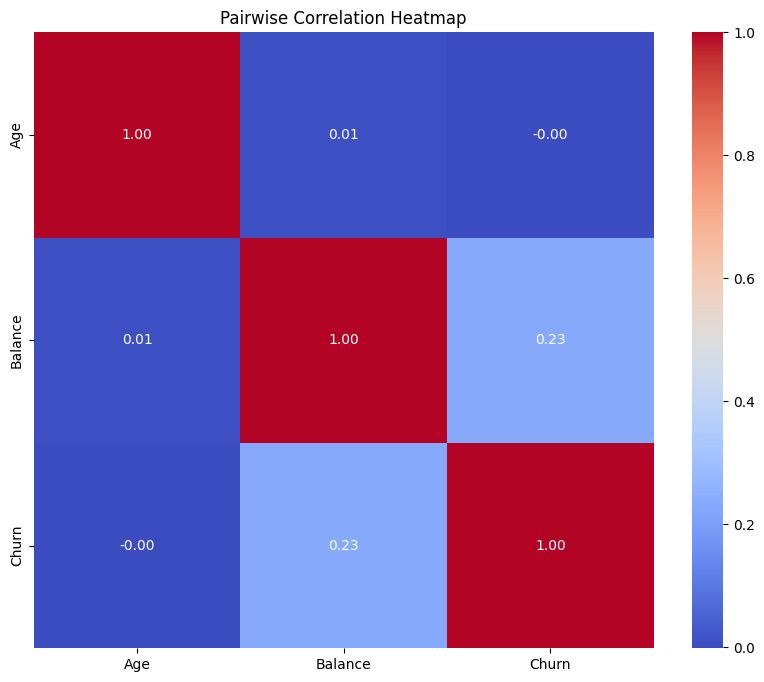

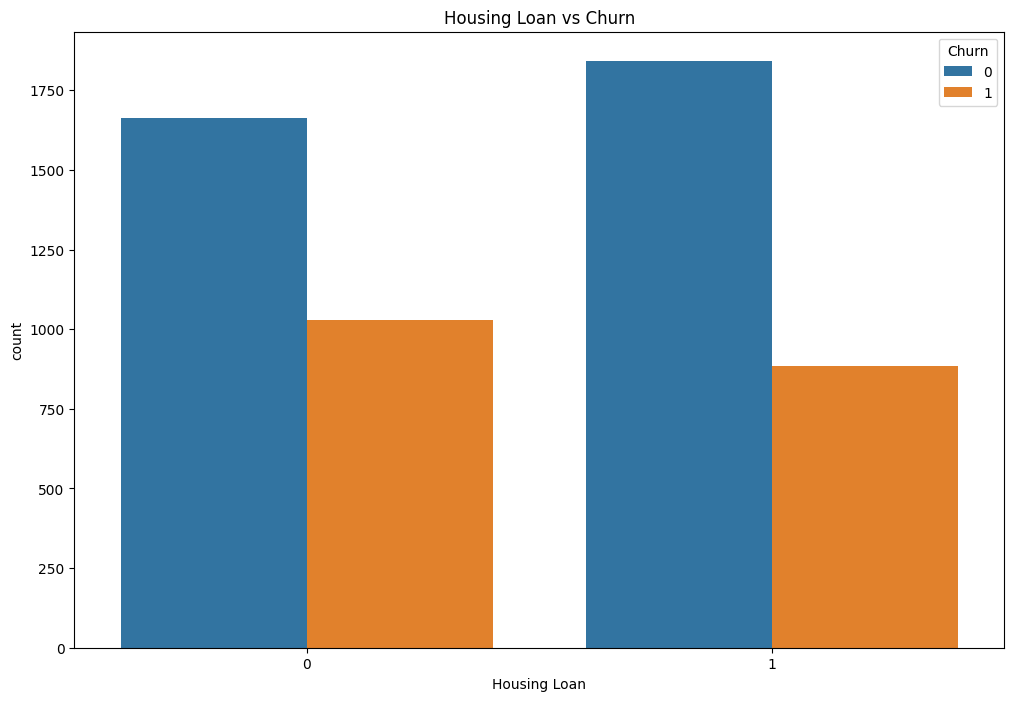

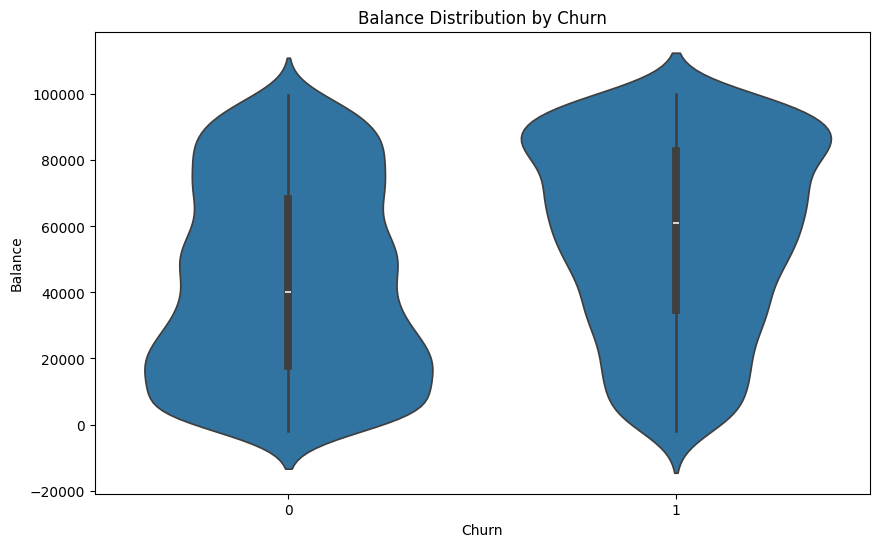

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

mydata = pd.read_csv('/content/churn_data_logistic2.csv')

# Convert categorical columns to numerical values using One-Hot Encoding
mydata_encoded = pd.get_dummies(mydata, drop_first=True)


label_columns = ['Default', 'Housing Loan', 'Personal Loan', 'Current Campaign']
label_encoder = LabelEncoder()

for col in label_columns:
    mydata_encoded[col] = label_encoder.fit_transform(mydata[col])

# Display first few rows of the encoded dataset
print("First few rows of the encoded dataset:")
print(mydata_encoded.head())

# Data Summary
print("\nData Summary:")
print(mydata_encoded.info())

# Checking for missing values
print("\nMissing values in each column:")
print(mydata_encoded.isnull().sum())

# Descriptive Statistics (Numerical columns)
print("\nDescriptive Statistics (Numerical columns):")
print(mydata_encoded.describe())

# Univariate Analysis: Distribution of Numerical Variables
numerical_columns = mydata_encoded.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(mydata_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Distribution of Categorical Variables
categorical_columns = mydata_encoded.select_dtypes(include='object').columns
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(x=mydata_encoded[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Bivariate Analysis: Numerical vs Target (Churn)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Churn', y=col, data=mydata_encoded)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# Correlation Matrix (For Numerical Features)
correlation_matrix = mydata_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Chi-square Test for Categorical Variables with respect to Churn
from scipy.stats import chi2_contingency

# List of categorical variables to test
categorical_columns = ['Default', 'Housing Loan', 'Personal Loan', 'Current Campaign']

chi2_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(mydata_encoded[col], mydata_encoded['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2 Statistic': chi2_stat, 'P-Value': p_value, 'Degrees of Freedom': dof}

# Display Chi-square test results
print("\nChi-square Test Results:")
for col, result in chi2_results.items():
    print(f"\n{col}:")
    print(f"  Chi2 Statistic: {result['Chi2 Statistic']}")
    print(f"  P-Value: {result['P-Value']}")
    if result['P-Value'] < 0.05:
        print(f"  Inference: Significant association with Churn.")
    else:
        print(f"  Inference: No significant association with Churn.")

# Pairplot to check relationships between numerical columns
sns.pairplot(mydata_encoded[['Age', 'Balance', 'Churn']])
plt.show()

# Cross Tabulation for Categorical vs Categorical
print("\nCross Tabulation for Categorical Variables:")
print(pd.crosstab(mydata_encoded['Default'], mydata_encoded['Churn']))

# Visualizing Pairwise Relationships with Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mydata_encoded[['Age', 'Balance', 'Churn']].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()

# Visualizing Churn vs Other Categories
plt.figure(figsize=(12, 8))
sns.countplot(x='Housing Loan', hue='Churn', data=mydata_encoded)
plt.title('Housing Loan vs Churn')
plt.show()

# Violin plot for numerical variable vs Churn
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Balance', data=mydata_encoded)
plt.title('Balance Distribution by Churn')
plt.show()

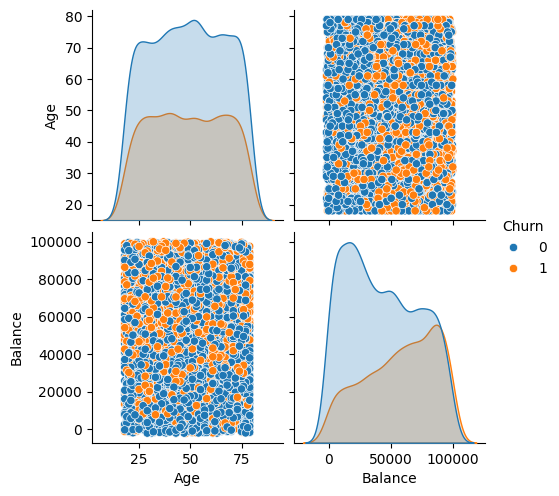

In [6]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot with 'Age' and 'Balance', and 'Churn' as hue
sns.pairplot(mydata_encoded[['Age', 'Balance', 'Churn']], hue='Churn')

# Display the plot
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = mydata_encoded.drop('Churn', axis=1)  # All features except 'Churn'
y = mydata_encoded['Churn']  # Target variable: Churn

# Scale the features to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model with increased max_iter and 'lbfgs' solver
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Fit the model
logreg_model.fit(X_train, y_train)

# Get the coefficients
coefficients = logreg_model.coef_[0]

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Display the most influential features
print("\nLogistic Regression Coefficients:")
print(coeff_df)


Logistic Regression Coefficients:
            Feature  Coefficient
1           Default     1.108980
2           Balance     1.026532
6   Marital_Married    -0.003026
0               Age    -0.053521
3      Housing Loan    -0.204045
4     Personal Loan    -0.305447
7    Marital_Single    -0.450294
5  Current Campaign    -2.022483


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
mydata = pd.read_csv('/content/churn_data_logistic2.csv')

# Display first few rows to inspect data
print("First few rows of the dataset:")
print(mydata.head())

# Check for missing values
print("\nMissing values in each column:")
print(mydata.isnull().sum())

# Basic summary statistics for numerical features
print("\nDescriptive Statistics (Numerical columns):")
print(mydata.describe())

# Handle missing values (if any) - For this example, we will drop rows with missing values
# If you prefer to impute missing values, consider using .fillna() instead
mydata = mydata.dropna()

# Encoding categorical columns (for simplicity, using Label Encoding for binary features)
label_columns = ['Default', 'Housing Loan', 'Personal Loan', 'Current Campaign']
label_encoder = LabelEncoder()

for col in label_columns:
    mydata[col] = label_encoder.fit_transform(mydata[col])

# One-hot encoding for 'Marital' column
mydata = pd.get_dummies(mydata, columns=['Marital'], drop_first=False)

# Check the encoded dataset
print("\nDataset after encoding (including 'Divorced' as a dummy variable):")
print(mydata.head())


# Feature and target split
X = mydata.drop('Churn', axis=1)  # All features except 'Churn'
y = mydata['Churn']  # Target variable: Churn

# Scaling the features to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Fit the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model - Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")

# Get the coefficients
coefficients = logreg_model.coef_[0]

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Display the most influential features
print("\nLogistic Regression Coefficients:")
print(coeff_df)

First few rows of the dataset:
   Age   Marital  Default  Balance  Housing Loan  Personal Loan  \
0   56  Divorced        1    36515             1              0   
1   69  Divorced        0    87144             0              1   
2   46  Divorced        1    25898             0              1   
3   32   Married        0      -81             0              0   
4   60   Married        0    48070             1              0   

   Current Campaign  Churn  
0                 0      1  
1                 0      1  
2                 0      1  
3                 1      0  
4                 0      0  

Missing values in each column:
Age                 0
Marital             0
Default             0
Balance             0
Housing Loan        0
Personal Loan       0
Current Campaign    0
Churn               0
dtype: int64

Descriptive Statistics (Numerical columns):
               Age      Default       Balance  Housing Loan  Personal Loan  \
count  5420.000000  5420.000000   5420.000000   

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
mydata = pd.read_csv('/content/churn_data_logistic2.csv')

# Display the first few rows of the dataset to inspect it
print("First few rows of the dataset:")
print(mydata.head())

# Check for missing values
print("\nMissing values in each column:")
print(mydata.isnull().sum())

# Handle missing values (if any) - For this example, we will drop rows with missing values
# If you prefer to impute missing values, consider using .fillna() instead
mydata = mydata.dropna()

# Encoding categorical columns (for simplicity, using Label Encoding for binary features)
label_columns = ['Default', 'Housing Loan', 'Personal Loan', 'Current Campaign']
label_encoder = LabelEncoder()

for col in label_columns:
    mydata[col] = label_encoder.fit_transform(mydata[col])

# One-hot encoding for 'Marital' column, without dropping any category
mydata = pd.get_dummies(mydata, columns=['Marital'], drop_first=False)

# Check the encoded dataset
print("\nDataset after encoding (including 'Divorced' as a dummy variable):")
print(mydata.head())

# Feature and target split
X = mydata.drop('Churn', axis=1)  # All features except 'Churn'
y = mydata['Churn']  # Target variable: Churn

# Scaling the features to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Fit the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model - Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")

# Get the coefficients
coefficients = logreg_model.coef_[0]

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Display the most influential features
print("\nLogistic Regression Coefficients:")
print(coeff_df)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

First few rows of the dataset:
   Age   Marital  Default  Balance  Housing Loan  Personal Loan  \
0   56  Divorced        1    36515             1              0   
1   69  Divorced        0    87144             0              1   
2   46  Divorced        1    25898             0              1   
3   32   Married        0      -81             0              0   
4   60   Married        0    48070             1              0   

   Current Campaign  Churn  
0                 0      1  
1                 0      1  
2                 0      1  
3                 1      0  
4                 0      0  

Missing values in each column:
Age                 0
Marital             0
Default             0
Balance             0
Housing Loan        0
Personal Loan       0
Current Campaign    0
Churn               0
dtype: int64

Dataset after encoding (including 'Divorced' as a dummy variable):
   Age  Default  Balance  Housing Loan  Personal Loan  Current Campaign  \
0   56        1    36515    

In [10]:
# Import joblib to export the model
import joblib

# Save the trained Logistic Regression model to a file
joblib.dump(logreg_model, 'logreg_model.pkl')

# Writing the model equation
print("\nModel Equation:")

# Start the equation
equation = f"Churn = 1 / (1 + exp(-(Intercept + "

# Add the coefficients and features to the equation
equation += " + ".join([f"{coef:.4f} * {feature}" for coef, feature in zip(logreg_model.coef_[0], X.columns)])

# Close the equation
equation += f" + {logreg_model.intercept_[0]:.4f}))"

# Display the model equation
print(equation)

# Save the equation to a text file
with open('logreg_model_equation.txt', 'w') as f:
    f.write(equation)

print("\nModel equation has been saved to 'logreg_model_equation.txt'.")


Model Equation:
Churn = 1 / (1 + exp(-(Intercept + -0.0237 * Age + 1.1276 * Default + 1.0509 * Balance + -0.2365 * Housing Loan + -0.3051 * Personal Loan + -2.0903 * Current Campaign + 0.1725 * Marital_Divorced + 0.1427 * Marital_Married + -0.3174 * Marital_Single + -1.3349))

Model equation has been saved to 'logreg_model_equation.txt'.


In [11]:
# Import necessary libraries
import joblib

# Save the trained Logistic Regression model to a file (model file)
joblib.dump(logreg_model, 'logreg_model.pkl')

# Save the StandardScaler (used for scaling the features) to a file (scaler file)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler have been exported successfully!")

Model and scaler have been exported successfully!


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=24)

# Fit the model to the training data (using the selected features)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

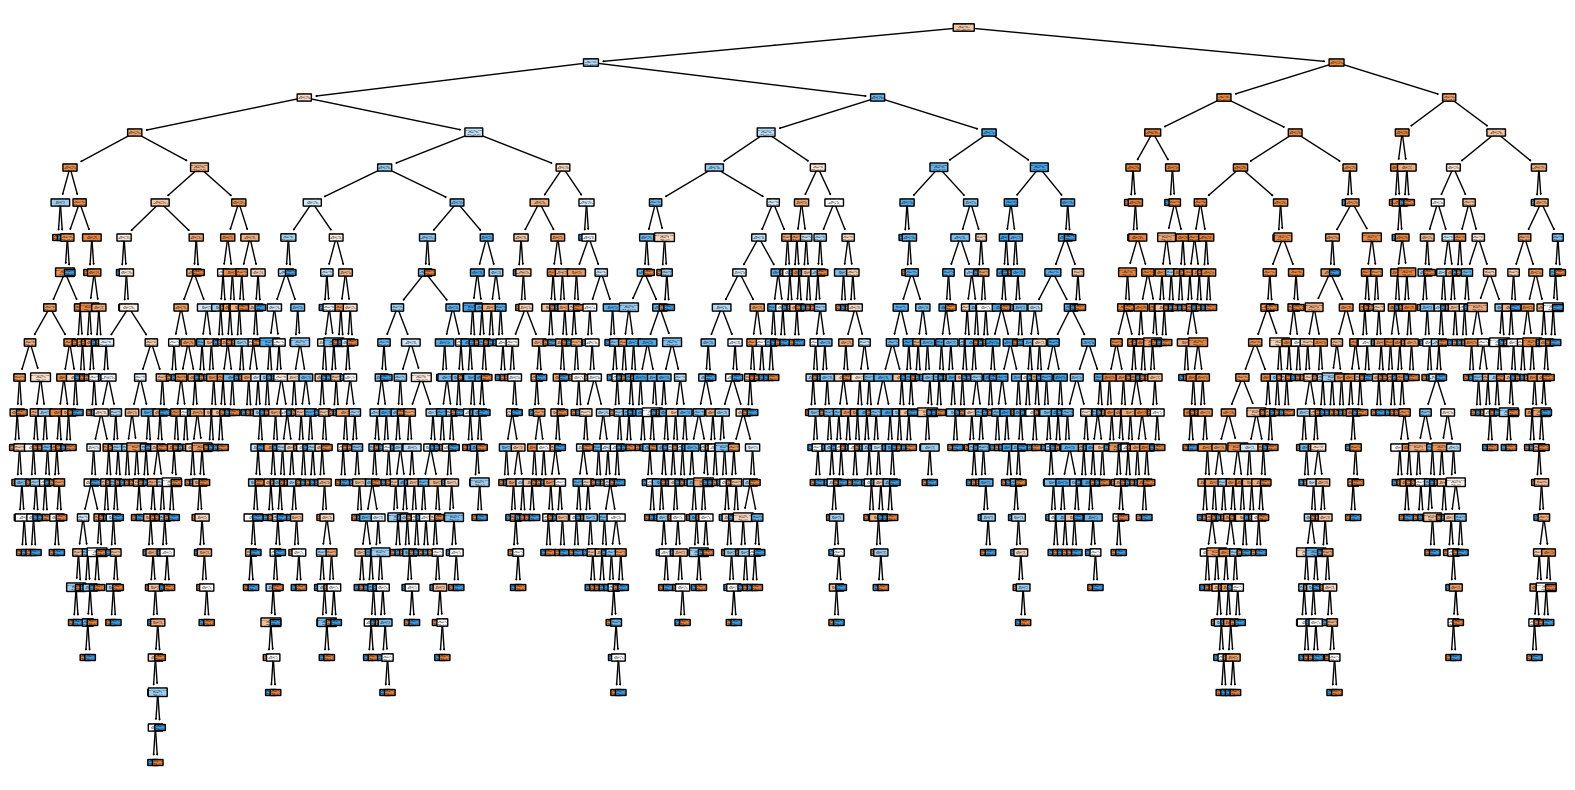

In [13]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
# Use the original DataFrame's (X) column names instead of X_train
plot_tree(cart_model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

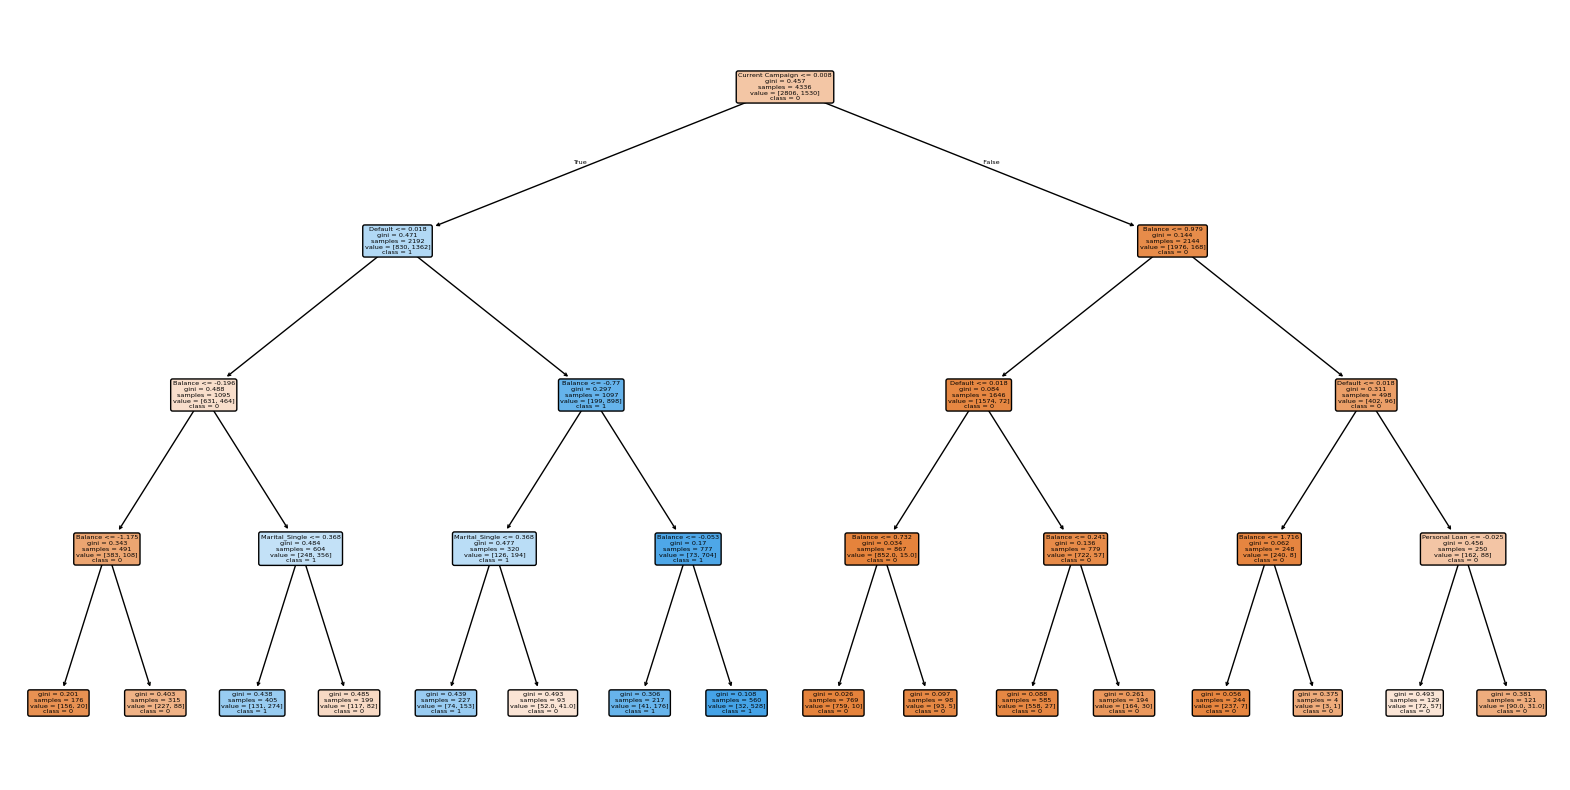

In [14]:
# prompt: prune the tree for 4 levels

# Initialize the CART model with max_depth=4
cart_model = DecisionTreeClassifier(max_depth=4, random_state=24)

# Fit the model to the training data
cart_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
# Use the original DataFrame's (X) column names instead of X_train.columns
plot_tree(cart_model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

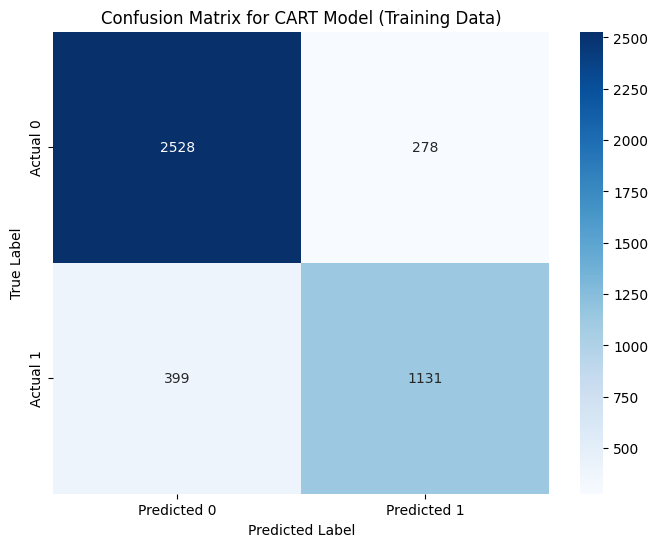

CART Model Performance (Training Data):
Accuracy: 0.8439
Precision: 0.8027
Recall: 0.7392
F1 Score: 0.7696


In [17]:
# Predict on the training data
y_pred_cart = cart_model.predict(X_train)

# Create the confusion matrix
cm_cart = confusion_matrix(y_train, y_pred_cart)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CART Model (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate evaluation metrics
accuracy_cart = accuracy_score(y_train, y_pred_cart)
precision_cart = precision_score(y_train, y_pred_cart)
recall_cart = recall_score(y_train, y_pred_cart)
f1_cart = f1_score(y_train, y_pred_cart)

print(f"CART Model Performance (Training Data):")
print(f"Accuracy: {accuracy_cart:.4f}")
print(f"Precision: {precision_cart:.4f}")
print(f"Recall: {recall_cart:.4f}")
print(f"F1 Score: {f1_cart:.4f}")

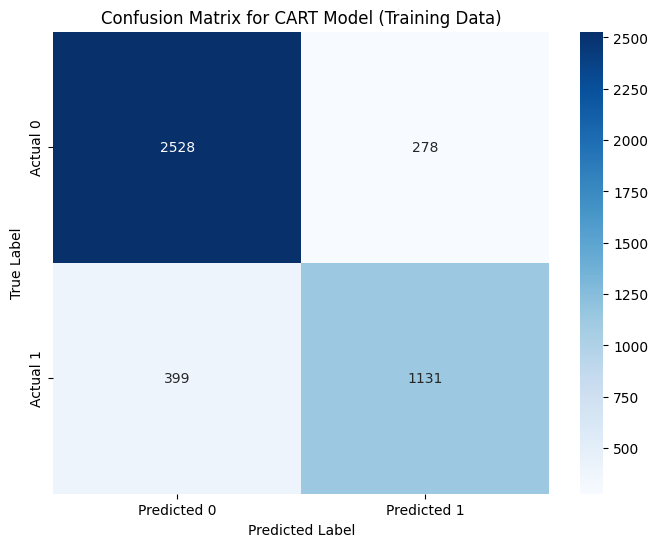

CART Model Performance (Training Data):
Accuracy: 0.8439
Precision: 0.8027
Recall: 0.7392
F1 Score: 0.7696


In [18]:
# Predict on the training data
y_pred_cart = cart_model.predict(X_train)

# Create the confusion matrix
cm_cart = confusion_matrix(y_train, y_pred_cart)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CART Model (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate evaluation metrics
accuracy_cart = accuracy_score(y_train, y_pred_cart)
precision_cart = precision_score(y_train, y_pred_cart)
recall_cart = recall_score(y_train, y_pred_cart)
f1_cart = f1_score(y_train, y_pred_cart)

print(f"CART Model Performance (Training Data):")
print(f"Accuracy: {accuracy_cart:.4f}")
print(f"Precision: {precision_cart:.4f}")
print(f"Recall: {recall_cart:.4f}")
print(f"F1 Score: {f1_cart:.4f}")